In [10]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, KFold
%matplotlib inline

ds=pd.read_csv("../DataSet/wine-quality/winequality-white.csv")
#查看数据集基本信息
ds.info();


# 数据预处理

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [2]:
#查看数据集后五条记录
ds.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [3]:
#查看数据集基本统计信息
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


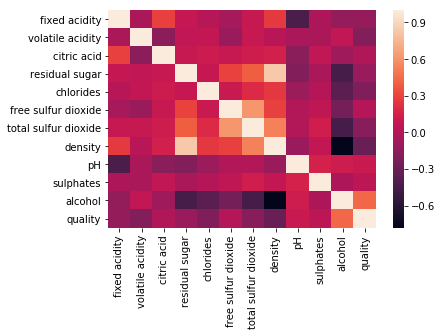

In [4]:
#查看数据集中是否有缺失值
print(ds.isnull().sum())

#相关性热力图
sns.heatmap(ds.corr(),annot=False)#annot=true，则在格子上显示数据

In [5]:
#分析变量之间的相关性
ds.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


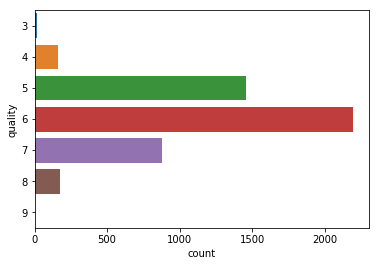

In [6]:
#对equality每个取值进行计数
sns.countplot(y='quality', data=ds)


In [32]:
#对equality每个取值进行计数
Counter(ds['quality'])


Counter({6: 2198, 5: 1457, 7: 880, 8: 175, 4: 163, 3: 20, 9: 5})

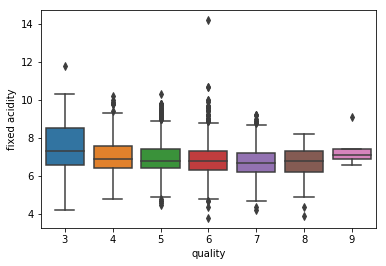

In [38]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'fixed acidity', data = ds)


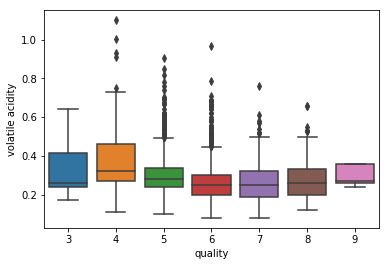

In [36]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'volatile acidity', data = ds)


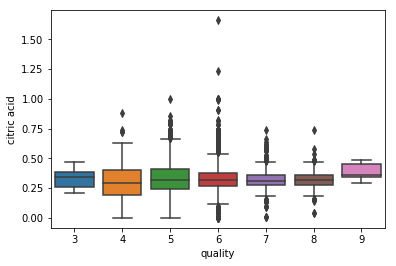

In [39]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'citric acid', data = ds)


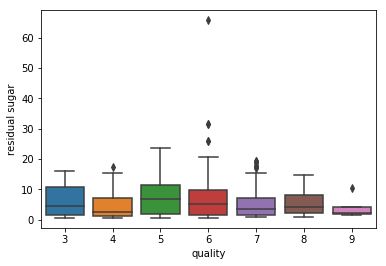

In [40]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'residual sugar', data = ds)


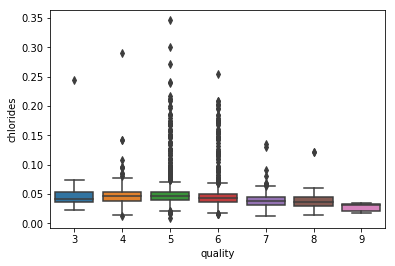

In [41]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'chlorides', data = ds)



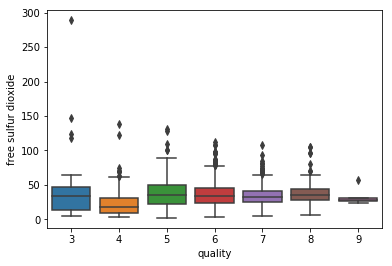

In [42]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'free sulfur dioxide', data = ds)


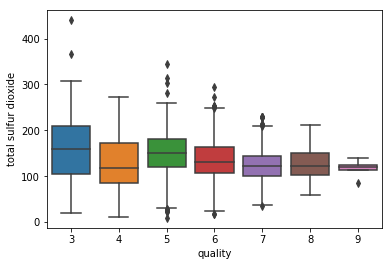

In [43]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'total sulfur dioxide', data = ds)


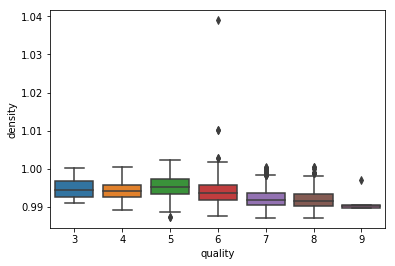

In [44]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'density', data = ds)



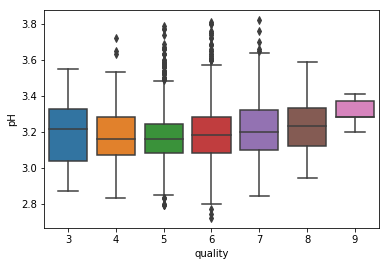

In [45]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'pH', data = ds)


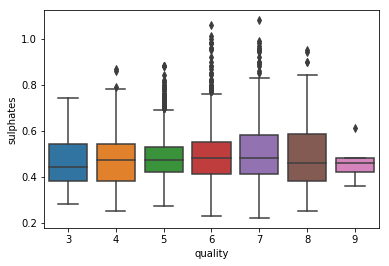

In [46]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'sulphates', data = ds)


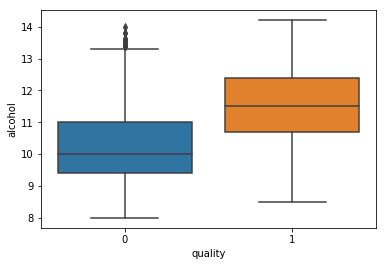

In [9]:
#异常值检测，使用箱线图
sns.boxplot('quality', 'alcohol', data = ds)


In [11]:
#以(2,6],(6,9]划分区间
bins = (2, 6, 9)
group_names = ['0', '1']
ds['quality'] = pd.cut(ds['quality'], bins = bins, labels = group_names)
ds.quality

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      0
15      1
16      0
17      1
18      0
19      0
20      1
21      1
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      1
       ..
4868    0
4869    0
4870    1
4871    0
4872    0
4873    0
4874    0
4875    0
4876    1
4877    0
4878    0
4879    0
4880    0
4881    0
4882    0
4883    0
4884    0
4885    0
4886    1
4887    1
4888    0
4889    0
4890    0
4891    0
4892    0
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: category
Categories (2, object): [0 < 1]

In [12]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null category
dtypes: category(1), float64(11)
memory usage: 425.9 KB


In [13]:
ds.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0


In [16]:
#划分x,y
x = ds.drop('quality',axis=1)
y = ds['quality']



In [17]:
#特征值标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


In [18]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)


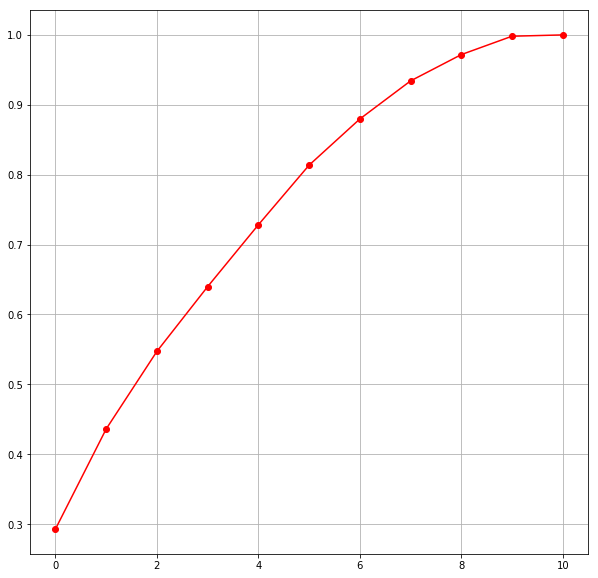

In [20]:
#寻找主成分，从图中可以看出90%的数据变化有8个主成分，
# 故而我们只使用前8个主成分分析即可
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()


In [21]:
#PCA
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)
print(x_new)


[[ 3.67694351 -0.54523329 -0.93042188 ... -0.89162041  0.20466402
  -1.02518356]
 [-0.64458784  0.43076995 -0.3563307  ... -0.48373761  0.4369978
   0.5849302 ]
 [ 0.15529055 -1.18979993 -0.01753152 ... -0.50068158  0.5543186
   0.97490219]
 ...
 [-0.77973054 -0.40848012 -0.66467688 ...  0.13379125 -1.61648248
  -0.2784727 ]
 [-3.40730151  0.9157439  -0.26829676 ...  0.49713543  0.97853291
  -0.1659628 ]
 [-2.8232115  -0.13093864  0.21388983 ...  0.55030897  0.96572294
   0.04722999]]


In [22]:
#划分测试集和数据集
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)
#只取了前8个主成分
print(x_train.shape)
print(y_train.shape)


##机器学习模型验证
# 也可使用dt_accuracy=dt.score(x_test,y_test)预测，两者准确率是同一个

(3673, 8)
(3673,)


决策树预测结果: ['0' '1' '0' ... '0' '1' '0']
分类报告:
              precision    recall  f1-score   support

          0       0.91      0.88      0.89       969
          1       0.59      0.66      0.62       256

avg / total       0.84      0.83      0.84      1225

决策树准确率:83.3469%

误差矩阵:
 [[852 117]
 [ 87 169]]
四折交叉验证的准确率列表 [0.83265306 0.82285714 0.82107843 0.82843137]
决策树四折交叉验证的准确率均值 0.8262550020008003


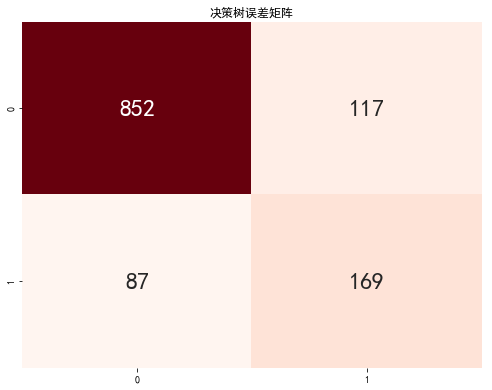

In [26]:
#决策树
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_accuracy=accuracy_score(y_test, dt_predict)*100
dt_conf_matrix = confusion_matrix(y_test, dt_predict)

print('决策树预测结果:',dt_predict)
print("分类报告:\n", classification_report(y_test, dt_predict))
print('决策树准确率:%.4f%%\n' %dt_accuracy)
print('误差矩阵:\n',dt_conf_matrix)
plt.figure(figsize=(28,14))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.subplot(2,3,1)
plt.title("决策树误差矩阵")
sns.heatmap(dt_conf_matrix,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

#交叉验证 (四折交叉验证)
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=4, shuffle=True)
score_ndarray = cross_val_score(dt, x_new, y, cv=kf)
print('四折交叉验证的准确率列表',score_ndarray)
print('决策树四折交叉验证的准确率均值',score_ndarray.mean())




朴素贝叶斯预测结果: ['0' '0' '1' ... '0' '0' '0']
分类报告:
              precision    recall  f1-score   support

          0       0.83      0.92      0.87       969
          1       0.46      0.27      0.34       256

avg / total       0.75      0.78      0.76      1225

朴素贝叶斯准确率:78.0408%

误差矩阵:
 [[888  81]
 [188  68]]
四折交叉验证的准确率列表 [0.78122449 0.83755102 0.73529412 0.76062092]
朴素贝叶斯四折交叉验证的准确率均值 0.7786726357209551


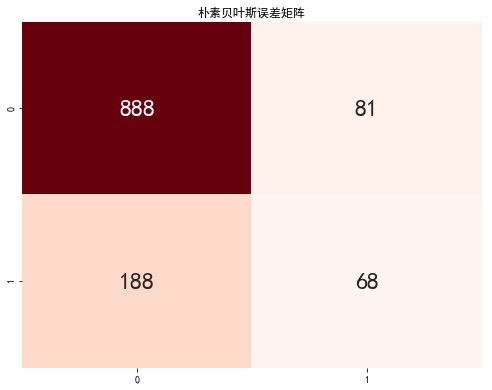

In [28]:
#贝叶斯
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict = nb.predict(x_test)
nb_accuracy=accuracy_score(y_test, nb_predict)*100
nb_conf_matrix = confusion_matrix(y_test, nb_predict)

print('朴素贝叶斯预测结果:',nb_predict)
print("分类报告:\n", classification_report(y_test, nb_predict))
print('朴素贝叶斯准确率:%.4f%%\n' %nb_accuracy)
print('误差矩阵:\n',nb_conf_matrix)
plt.figure(figsize=(28,14))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.subplot(2,3,1)
plt.title("朴素贝叶斯误差矩阵")
sns.heatmap(nb_conf_matrix,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

#交叉验证 (四折交叉验证)
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=4, shuffle=False)
score_ndarray = cross_val_score(nb, x_new, y, cv=kf)
print('四折交叉验证的准确率列表',score_ndarray)
print('朴素贝叶斯四折交叉验证的准确率均值',score_ndarray.mean())


F:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


随机森林预测结果: ['0' '0' '0' ... '0' '1' '0']
分类报告:
              precision    recall  f1-score   support

          0       0.88      0.97      0.93       969
          1       0.83      0.52      0.64       256

avg / total       0.87      0.88      0.87      1225

随机森林准确率:87.7551%

误差矩阵:
 [[942  27]
 [123 133]]
四折交叉验证的准确率列表 [0.79265306 0.84244898 0.75898693 0.80555556]
随机森林四折交叉验证的准确率均值 0.7999111311191143


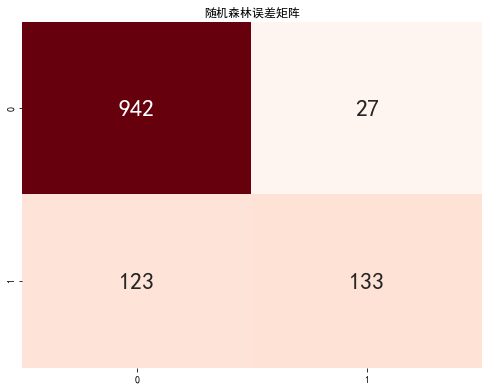

In [29]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 666, random_state = 1)
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_accuracy=accuracy_score(y_test, rf_predict)*100
rf_conf_matrix = confusion_matrix(y_test, rf_predict)

print('随机森林预测结果:',rf_predict)
print("分类报告:\n", classification_report(y_test, rf_predict))
print('随机森林准确率:%.4f%%\n' %rf_accuracy)
print('误差矩阵:\n',rf_conf_matrix)
plt.figure(figsize=(28,14))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.subplot(2,3,1)
plt.title("随机森林误差矩阵")
sns.heatmap(rf_conf_matrix,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

#交叉验证 (四折交叉验证)
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=4, shuffle=False)
score_ndarray = cross_val_score(rf, x_new, y, cv=kf)
print('四折交叉验证的准确率列表',score_ndarray)
print('随机森林四折交叉验证的准确率均值',score_ndarray.mean())




SVM预测结果: ['0' '0' '0' ... '0' '0' '0']
分类报告:
              precision    recall  f1-score   support

          0       0.84      0.96      0.90       969
          1       0.69      0.29      0.41       256

avg / total       0.81      0.82      0.79      1225

SVM准确率:82.3673%

误差矩阵:
 [[935  34]
 [182  74]]
四折交叉验证的准确率列表 [0.78857143 0.83755102 0.76470588 0.79738562]
SVM四折交叉验证的准确率均值 0.7970534880618914


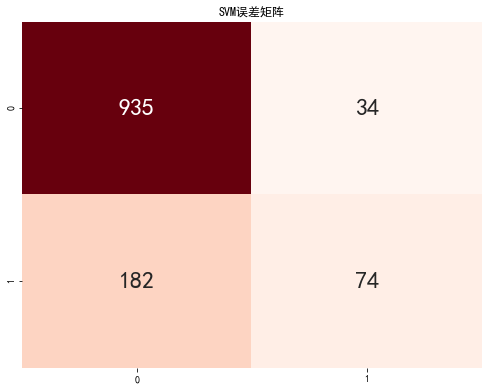

In [30]:
#SVM支持向量机
from sklearn.svm import SVC
svm = SVC(random_state = 0)
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)
svm_accuracy=accuracy_score(y_test, svm_predict)*100
svm_conf_matrix = confusion_matrix(y_test, svm_predict)

print('SVM预测结果:',svm_predict)
print("分类报告:\n", classification_report(y_test, svm_predict))
print('SVM准确率:%.4f%%\n' %svm_accuracy)
print('误差矩阵:\n',svm_conf_matrix)
plt.figure(figsize=(28,14))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.subplot(2,3,1)
plt.title("SVM误差矩阵")
sns.heatmap(svm_conf_matrix,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

#交叉验证 (四折交叉验证)
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=4, shuffle=False)
score_ndarray = cross_val_score(svm, x_new, y, cv=kf)
print('四折交叉验证的准确率列表',score_ndarray)
print('SVM四折交叉验证的准确率均值',score_ndarray.mean())



F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

sgd预测结果: ['1' '0' '1' ... '0' '0' '0']
分类报告:
              precision    recall  f1-score   support

          0       0.82      0.76      0.79       969
          1       0.29      0.36      0.32       256

avg / total       0.71      0.68      0.69      1225

sgd准确率:67.9184%

误差矩阵:
 [[740 229]
 [164  92]]
四折交叉验证的准确率列表 [0.7844898  0.80326531 0.68627451 0.70751634]
sgd四折交叉验证的准确率均值 0.7453864879285048


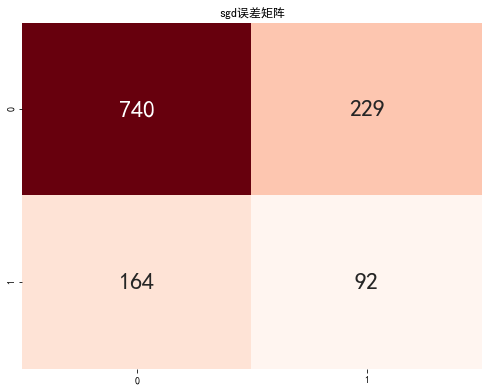

In [32]:
#随机梯度下降分类
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train,y_train)
sgd_predict = sgd.predict(x_test)
sgd_accuracy=accuracy_score(y_test, sgd_predict)*100
sgd_conf_matrix = confusion_matrix(y_test, sgd_predict)

print('sgd预测结果:',sgd_predict)
print("分类报告:\n", classification_report(y_test, sgd_predict))
print('sgd准确率:%.4f%%\n' %sgd_accuracy)
print('误差矩阵:\n',sgd_conf_matrix)
plt.figure(figsize=(28,14))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.subplot(2,3,1)
plt.title("sgd误差矩阵")
sns.heatmap(sgd_conf_matrix,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

#交叉验证 (四折交叉验证)
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=4, shuffle=False)
score_ndarray = cross_val_score(sgd, x_new, y, cv=kf)
print('四折交叉验证的准确率列表',score_ndarray)
print('sgd四折交叉验证的准确率均值',score_ndarray.mean())



逻辑回归预测结果: ['0' '0' '0' ... '1' '0' '0']
分类报告:
              precision    recall  f1-score   support

          0       0.82      0.95      0.88       974
          1       0.50      0.20      0.28       251

avg / total       0.75      0.79      0.76      1225

逻辑回归准确率:79.4286%

误差矩阵:
 [[923  51]
 [201  50]]
四折交叉验证的准确率列表 [0.79265306 0.82857143 0.76470588 0.78513072]
逻辑回归四折交叉验证的准确率均值 0.7927652727757769


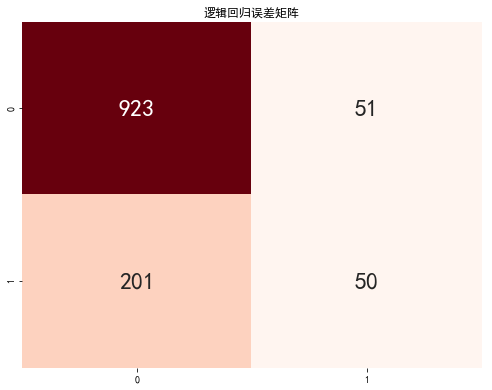

In [187]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr_accuracy=accuracy_score(y_test, lr_predict)*100
lr_conf_matrix = confusion_matrix(y_test, lr_predict)

print('逻辑回归预测结果:',lr_predict)
print("分类报告:\n", classification_report(y_test, lr_predict))
print('逻辑回归准确率:%.4f%%\n' %lr_accuracy)
print('误差矩阵:\n',lr_conf_matrix)
plt.figure(figsize=(28,14))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.subplot(2,3,1)
plt.title("逻辑回归误差矩阵")
sns.heatmap(lr_conf_matrix,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

#交叉验证 (四折交叉验证)
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=4, shuffle=False)
score_ndarray = cross_val_score(lr, x_new, y, cv=kf)
print('四折交叉验证的准确率列表',score_ndarray)
print('逻辑回归四折交叉验证的准确率均值',score_ndarray.mean())
